## Figure 1: Private and Federal Student Debt

from "Student Debt Cancellation *Is* Progressive", a Roosevelt Institute research paper 

by Charlie Eaton, Adam Goldstein, Laura Hamilton, and Frederick Wherry

In [ ]:
*ssc install dubois

In [1]:
graph set svg fontface Tahoma
graph set eps fontface Tahoma
graph set ps fontface Tahoma
set scheme dubois

In [2]:
use data/scfstudentdebt2019, clear

In [3]:
xtile incomedecile=income [pw=wgt], n(10)
label var incomedecile "Catherine/Yannelis income deciles"
label define incomedecile 1 "0-10%" 2 "10-20%" 3 "20-30%" 4 "30-40%" 5 "40-50%" ///
6 "50-60%" 7 "60-70%" 8 "70-80%" 9 "80-90%" 10 "90-100%"
label values incomedecile incomedecile

qui gen percaprpy=percapfedloan-norpyfedloanpercap
gen withprivate=percaprpy+percapprivate

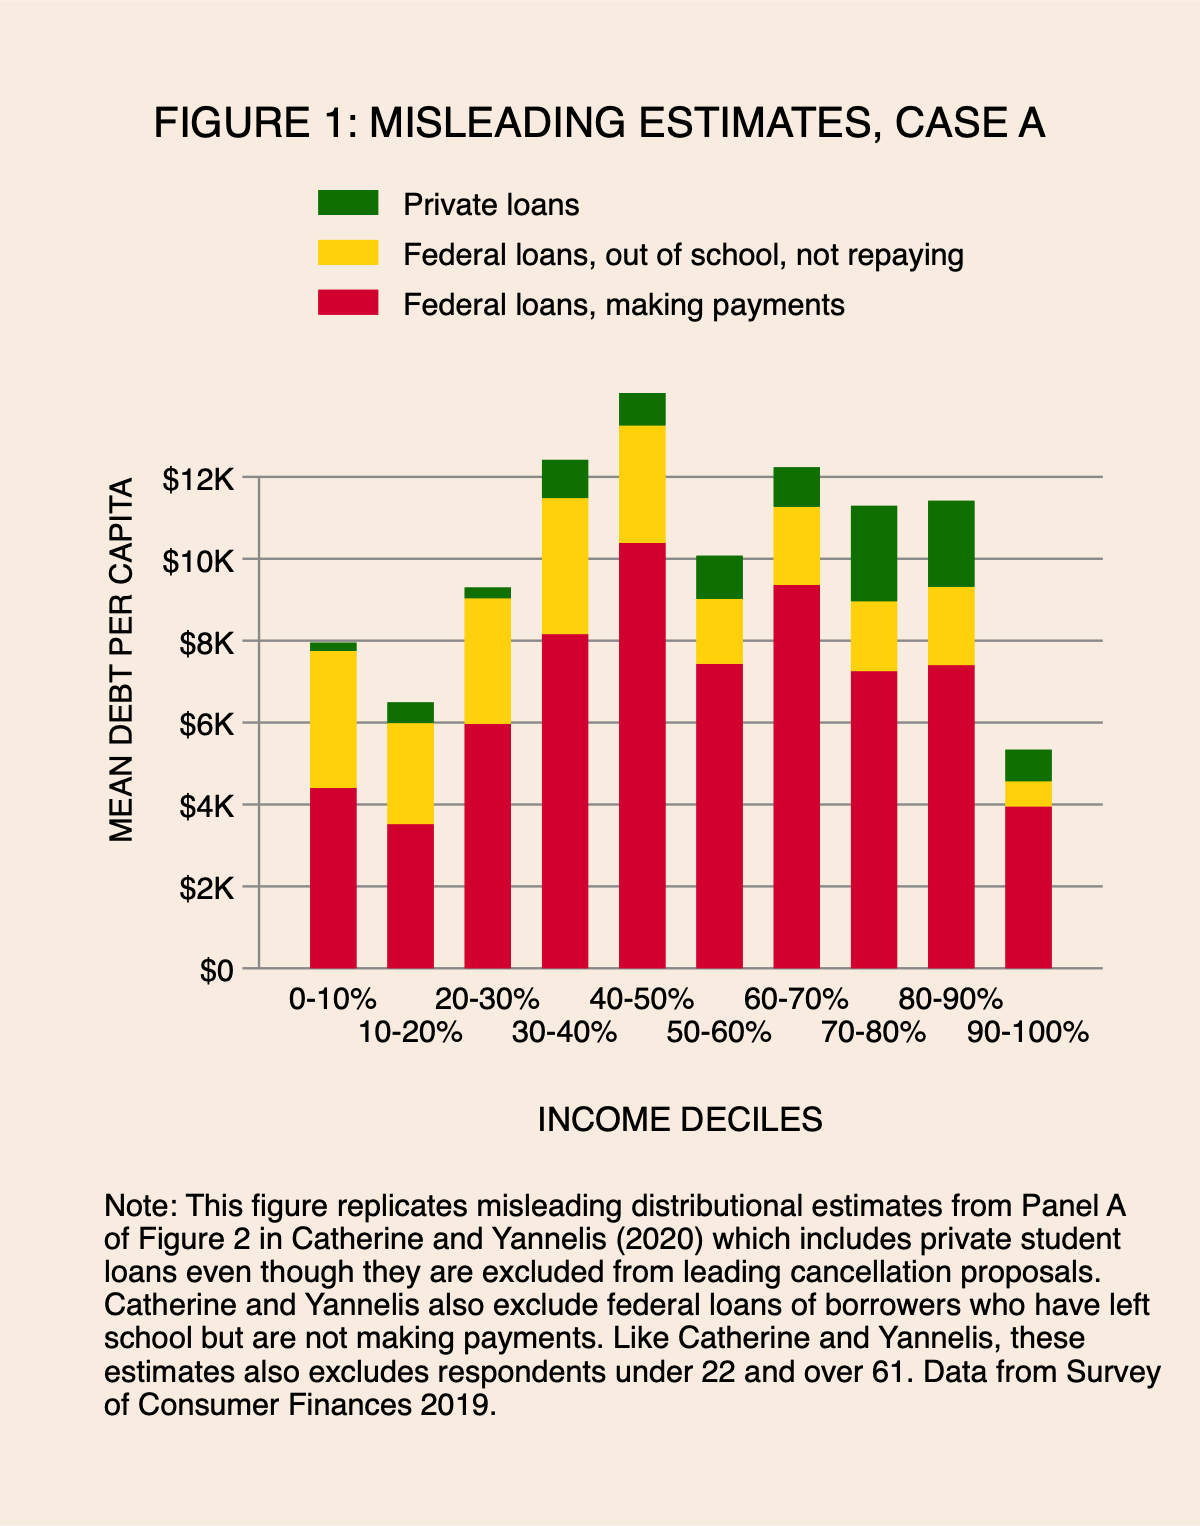

In [4]:
graph bar (mean) percapfedloan norpyfedloanpercap percapprivate [pw=wgt] ///
    if selfstudent!=1 & spousestudent!=1 & age<61 & age>21, over(incomedecile, label(alternate)) ///
    stack b1title(" " "INCOME DECILES" " ", size(3)) ytitle(MEAN DEBT PER CAPITA) scheme(dubois) ///
    ylabel(0 "$0" 2000 "$2K" 4000 "$4K" 6000 "$6K" 8000 "$8K" 10000 "$10K" 12000 "$12K") ///
    title("FIGURE 1: MISLEADING ESTIMATES, CASE A", size(3.5)  ///
    span) legend(pos(12) order(3 2 1) label(1 "Federal loans, making payments") ///
    label(2 "Federal loans, out of school, not repaying") label(3 "Private loans")) ///
    note("Note: This figure replicates misleading distributional estimates from Panel A" ///
        "of Figure 2 in Catherine and Yannelis (2020) which includes private student" ///
        "loans even though they are excluded from leading cancellation proposals." ///
        "Catherine and Yannelis also exclude federal loans of borrowers who have left" ///
        "school but are not making payments. Like Catherine and Yannelis, these" ///
        "estimates also excludes respondents under 22 and over 61. Data from Survey" ///
        "of Consumer Finances 2019. ", size(small) xoffset(0)) graphregion(margin(large))

qui graph export figures/f1_fedprivatedebt.pdf, replace

In [5]:
sum percapfedloan


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
percapfedl~n |     28,885    4213.045     17064.7          0     357000


In [6]:
qui regress withprivate i.incomedecile if selfstudent!=1 & spousestudent!=1 & age>21 & age<62 [pw=wgt] 
qui margins i.incomedecile , saving(data/withprivate, replace)

qui regress percaprpy i.incomedecile if selfstudent!=1 & spousestudent!=1 & age>21 & age<62 [pw=wgt] 
qui margins i.incomedecile , saving(data/percaprpy, replace)

qui regress percapfedloan i.incomedecile if selfstudent!=1 & spousestudent!=1 & age>21 & age<62 [pw=wgt] 
qui margins i.incomedecile , saving(data/percapfedloan, replace)

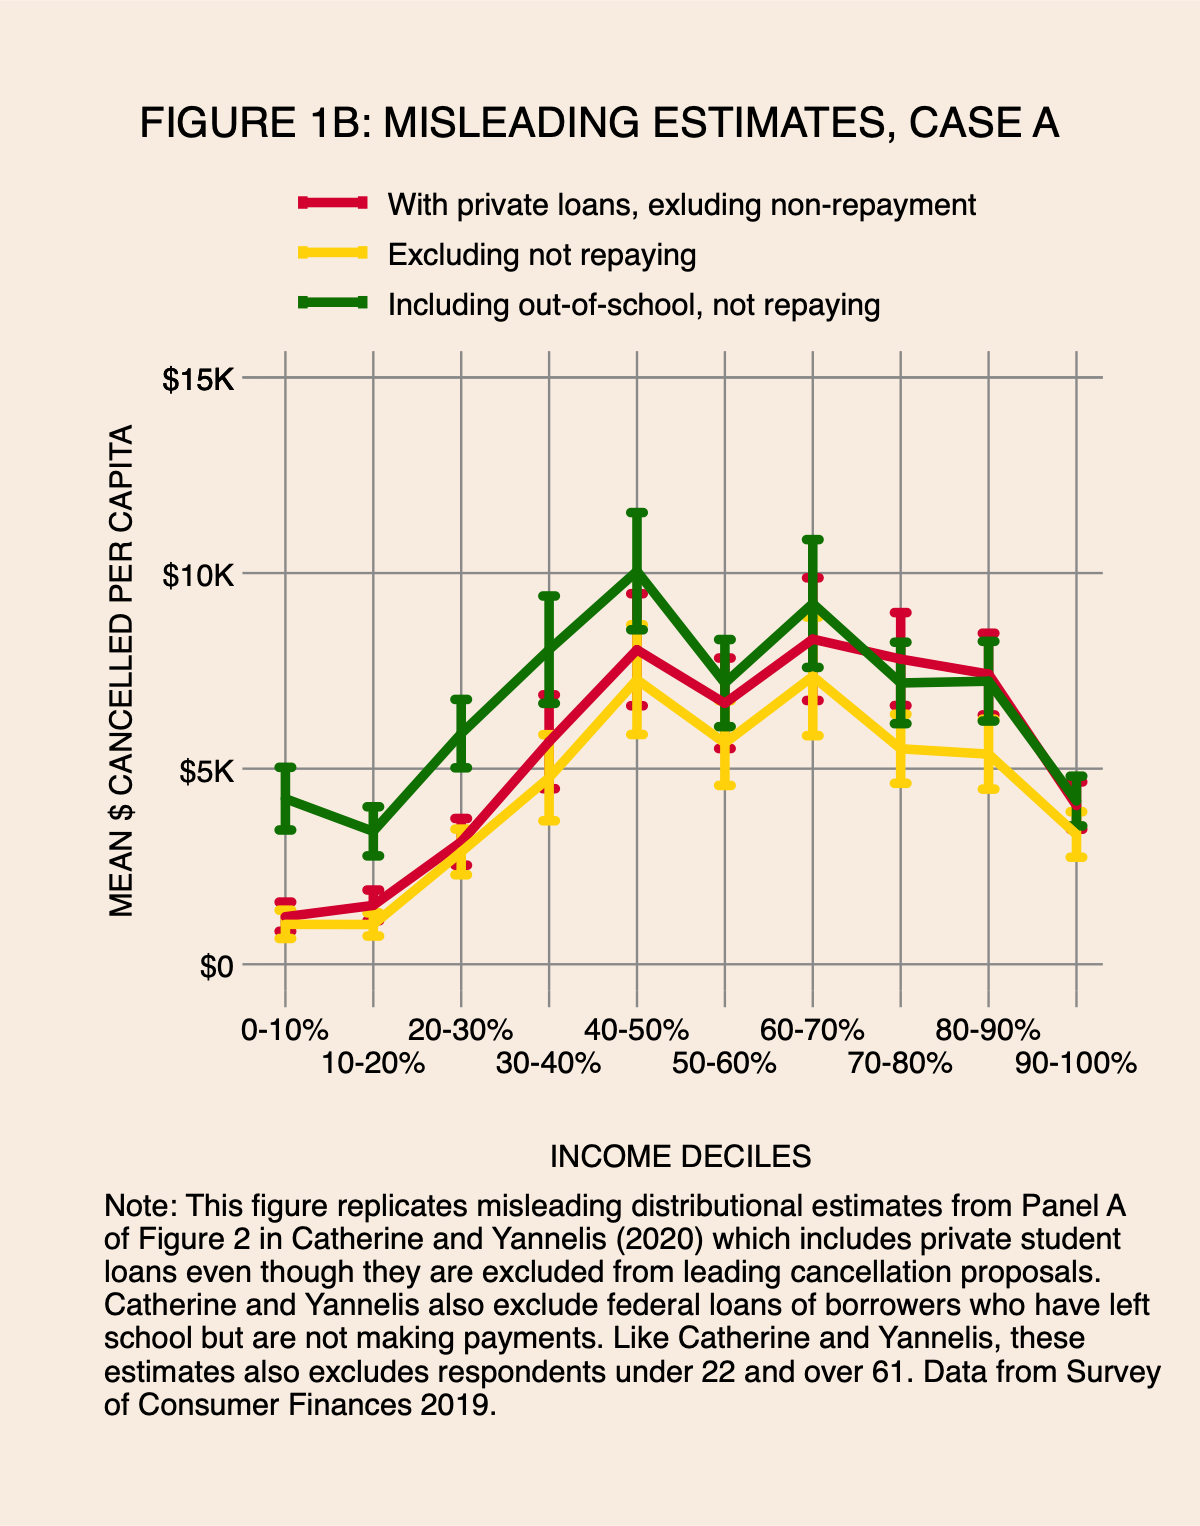

In [8]:
qui combomarginsplot12 data/withprivate data/percaprpy data/percapfedloan ///
    , ytitle(MEAN $ CANCELLED PER CAPITA) ///
    title("FIGURE 1B: MISLEADING ESTIMATES, CASE A", size(3.5)) ///
    legend(position(12) order(1 "With private loans, exluding non-repayment" 2 "Excluding not repaying" ///
    3 "Including out-of-school, not repaying")) ///
    note("Note: This figure replicates misleading distributional estimates from Panel A" ///
        "of Figure 2 in Catherine and Yannelis (2020) which includes private student" ///
        "loans even though they are excluded from leading cancellation proposals." ///
        "Catherine and Yannelis also exclude federal loans of borrowers who have left" ///
        "school but are not making payments. Like Catherine and Yannelis, these" ///
        "estimates also excludes respondents under 22 and over 61. Data from Survey" ///
        "of Consumer Finances 2019. ", size(small) xoffset(0)) graphregion(margin(large)) ///
        xscale(titlegap(large)) ylabel(0 "$0" 5000 "$5K" 10000 "$10K" 15000 "$15K" 15000 "$15K") ///
        xlabel(, alternate) xtitle(INCOME DECILES) scheme(dubois)

graph display